Python programme to process the energy readings.

Readings here are in 1 sec interval

Author: Dr. B. Umesh Rai

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import math

# Backup in another file
with open("csv/minuteReading.csv") as fileToRead:
    with open("csv/backupMinute.csv", "w") as fileToWrite:
        for line in fileToRead:
            fileToWrite.write(line)
fileToRead.close()
fileToWrite.close()

In [2]:
def addEnergy(minuteArray):
    print(minuteArray)


In [15]:
# Line counter
i,j = 0,0

# minute Variable
minute = 0
# words array variable to capture field
words,minuteArray,timeArray,result  = [],[],[],[]

# Initialise minute file with the starting minute
with open("csv/minuteReading.csv") as fileToRead:
    # Read the first 3 lines
    line = [next(fileToRead) for x in range(3)]
    # Ignore the first 2 lines as they are headers
    words = line[2].split(',')
    #print(line)
    # Extract the first minute reading from CSV
    timeArray = words[0].split(':')
    minute = int(timeArray[0])
   
fileToRead.close()
#print(minute)

with open("csv/minuteReading.csv") as fileToRead:
    for line in fileToRead:
        i +=1
        # Ignore the header lines
        if (i < 3):
            continue
        # Capture the field data in the csv file 
        # split by comma
        words = line.split(',')
        timeArray = words[0].split(':')
        # Initialise an array to store energy reading of the seconds
        secondsArray = []
        # Store the minute
        secondsArray.append(int(timeArray[0]))
        # Store the second
        secondsArray.append(math.floor(float(timeArray[1])))
        
        # Store 25 KV incoming energy reading
        secondsArray.append(float(words[1]))
        # Store 25 KV regenerated energy reading
        secondsArray.append(float(words[2]))
       
        # Store 33 KV incoming energy reading
        secondsArray.append(float(words[5]))
        # Store 33 KV regenerated energy reading
        secondsArray.append(float(words[6]))
        
        # Store 110 KV incoming energy reading
        secondsArray.append(float(words[3]))
        # Store 110 KV regenerated energy reading
        secondsArray.append(float(words[4]))
        #print(secondsArray)
        if (int(timeArray[0]) == minute):
            minuteArray.append(secondsArray)
        else:
            result.append(minuteArray)
            j = j + 1
            minute = int(timeArray[0])
            minuteArray = []
            
# Number of minutes rows in CSV
print(len(result))
# Number of rows for a particular minute
print(len(result[1]))
# Elements in the minute reading
#print(len(result[0][0]))
# Sample reading
#print(result[0])


181
59


In [4]:
# Function for adding the a colunms in a 2d list (list of list)
def colAdd(listOflist, colNo):
    sum = 0
    for subList in listOflist:
        sum += subList[colNo]
    #print (sum)
    # Return back the sum of column 
    return sum

# Function for making the minute reading a continous spectrum
# 60 minutes are ended at end of each cycle
def minPlusHour(lists):
    hour = 0
    for subList in lists:
        if subList[0] == 0:
            hour += 60
        subList[0] += hour
        #print(subList[0])
    return lists
    

In [5]:
sumOfresult = []

# We have a 3D list
# Extract the 2D list which is grouped by minute
for minuteMeter in result:
    # Add the 25KV, 33KV and 110KV column. Index by minute
    # 2D list is reduced to 1D list
    sumMinutes = [minuteMeter[0][0], colAdd(minuteMeter,2), colAdd(minuteMeter,3), 
        colAdd(minuteMeter,4), colAdd(minuteMeter,5), colAdd(minuteMeter,6), 
        colAdd(minuteMeter,7)]
    # Save in a 2D list. Each list containing the minute readings
    sumOfresult.append(sumMinutes)

# Minutes to be modified into a continous spectrum
minuteAggregate = minPlusHour(sumOfresult)

# Checking the result
#print(len(minuteAggregate))

In [16]:
timeOfReading = []
in25,rg25,in33,rg33,in110,rg110  = [],[],[],[],[],[]
 

# Split the list to different list for each voltage level in/out
# and one for the time of reading.
for subList in minuteAggregate:
    #print(subList)
    timeOfReading.append(subList[0])
    in25.append(subList[1])
    rg25.append(subList[2])
    in33.append(subList[3])
    rg33.append(subList[4])
    in110.append(subList[5])
    rg110.append(subList[6])

#print(timeOfReading)


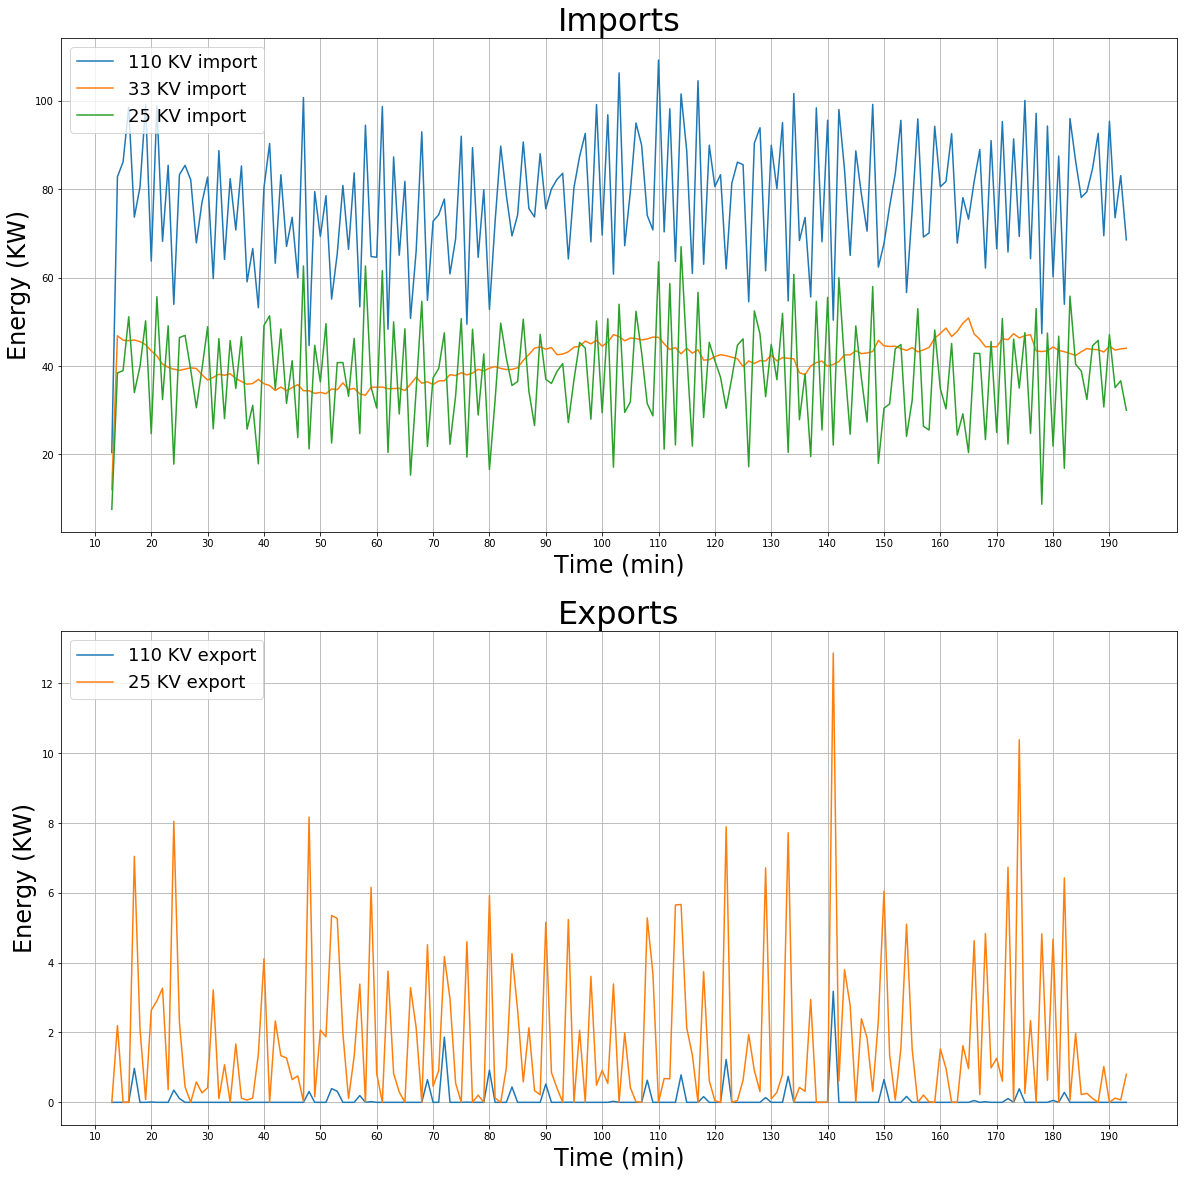

In [17]:
# Draw the plots as sub plots
fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(20,20))

# First plot the consumptions at all voltage level
ax1.plot(timeOfReading,np.divide(in110, 1000), label = '110 KV import')
ax1.plot(timeOfReading,np.divide(in33, 1000), label = '33 KV import')
ax1.plot(timeOfReading,np.divide(in25, 1000), label = '25 KV import')

# Set the axes properties
ax1.grid(True)
ax1.legend(loc="upper left", fontsize=18,)
ax1.set_xticks(np.arange(10,191,10))
ax1.set_ylabel('Energy (KW)', fontsize=24)
ax1.set_xlabel('Time (min)', fontsize=24)
ax1.set_title('Imports', fontsize=32)
bbox = ax1.get_tightbbox(fig.canvas.get_renderer())
fig.savefig("import.png", bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))

# Plot the regeneration energy for 25 KV and 110 KV
ax2.plot(timeOfReading,np.divide(rg110, 1000), label = '110 KV export')
#ax2.plot(timeOfReading,rg33, label = '33 KV export')
ax2.plot(timeOfReading,np.divide(rg25, 1000), label = '25 KV export')

# Set the axes properties
ax2.grid(True)
ax2.legend(loc="upper left", fontsize=18,)
ax2.set_xticks(np.arange(10,191,10))
ax2.set_ylabel('Energy (KW)', fontsize=24)
ax2.set_xlabel('Time (min)', fontsize=24)
ax2.set_title('Exports', fontsize=32)
bbox = ax2.get_tightbbox(fig.canvas.get_renderer())
fig.savefig("export.png", bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))


In [8]:
# Plot an horizontal line at value 3
horizontalLine = []
for k in range(181):
    horizontalLine.append(3)

#print(horizontalLine)

In [18]:
# Point of interest is time interval starting from
# 135 minute
i = timeOfReading.index(135)
#print(timeOfReading[i])

# prepare a list array to store the subset of observation
subListTime,subListRg25,subListRg110,subListIn33 = [],[],[],[]
 
minutesOfObservation = 10

# Store for observation minutes starting from 135 minutes
for j in range(minutesOfObservation):
    subListTime.append(timeOfReading[i])
    subListRg25.append(rg25[i])
    subListRg110.append(rg110[i])
    subListIn33.append(in33[i])
    i +=1

#print(subListTime)
#print(subListRg25)
#print(subListRg110)
#print(subListIn33)

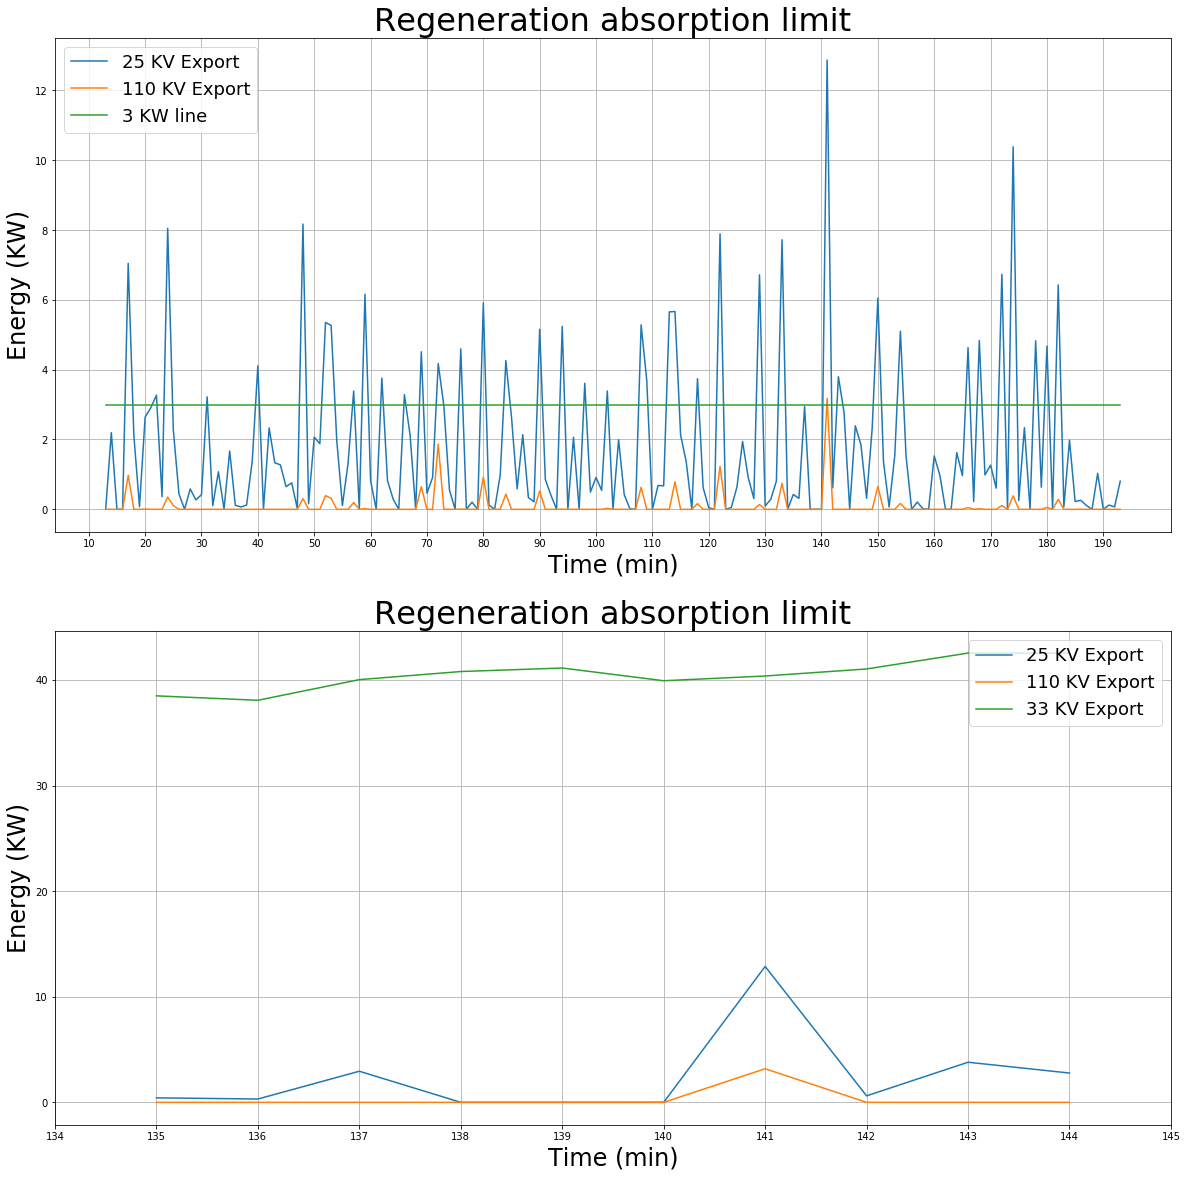

In [19]:
fig, ((ax1,ax2)) = plt.subplots(2, 1, figsize=(20,20))

# First plot the consumptions at all voltage level
ax1.plot(timeOfReading,np.divide(rg25, 1000), label = '25 KV Export')
ax1.plot(timeOfReading,np.divide(rg110, 1000), label = '110 KV Export')
ax1.plot(timeOfReading,horizontalLine, label = '3 KW line')

ax1.grid(True)
ax1.legend(loc="upper left", fontsize=18,)
ax1.set_xticks(np.arange(10,191,10))
ax1.set_ylabel('Energy (KW)', fontsize=24)
ax1.set_xlabel('Time (min)', fontsize=24)
ax1.set_title('Regeneration absorption limit', fontsize=32)
bbox = ax1.get_tightbbox(fig.canvas.get_renderer())
fig.savefig("exportLimit.png", bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))


ax2.plot(subListTime,np.divide(subListRg25, 1000), label = '25 KV Export')
ax2.plot(subListTime,np.divide(subListRg110, 1000), label = '110 KV Export')
ax2.plot(subListTime,np.divide(subListIn33, 1000), label = '33 KV Export')

ax2.grid(True)
ax2.legend(loc="upper right", fontsize=18,)
ax2.set_xticks(np.arange(134,146,))
ax2.set_ylabel('Energy (KW)', fontsize=24)
ax2.set_xlabel('Time (min)', fontsize=24)
ax2.set_title('Regeneration absorption limit', fontsize=32)
bbox = ax2.get_tightbbox(fig.canvas.get_renderer())
fig.savefig("subExportLimit.png", bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))



In [20]:
# 14th minute starts at row 18
# There are 60 rows per minute
# Therefore 135th minute will occur at row
rowNo = 134 * 60 + 18
#print(rowNo)

# The minute reading at that row should be
#print(135%60+13)

# Prepare array for unprocessed readings
i = 0
timeX,in25Y,rg25Y,in33Y,rg33Y,in110Y,rg110Y = [],[],[],[],[],[],[]

with open("csv/minuteReading.csv") as fileToRead:
    for line in fileToRead:
        i +=1
        
        # Start from the 135 minute
        if (i < 8058):
            continue
        
        # Stop at 144 minute
        if (i > 8058 + 60 * 9):
            break
        
        # Capture the field data in the csv file 
        # split by comma
        list = line.split(',')

        # Ignore the decimal value in seconds
        #print(list)
        timeX.append(list[0][:-2])
        in25Y.append(float(list[1]))
        rg25Y.append(float(list[2]))
        in33Y.append(float(list[5]))
        rg33Y.append(float(list[6]))
        in110Y.append(float(list[3]))
        rg110Y.append(float(list[4]))

#print(timeX)
#print(in25Y)

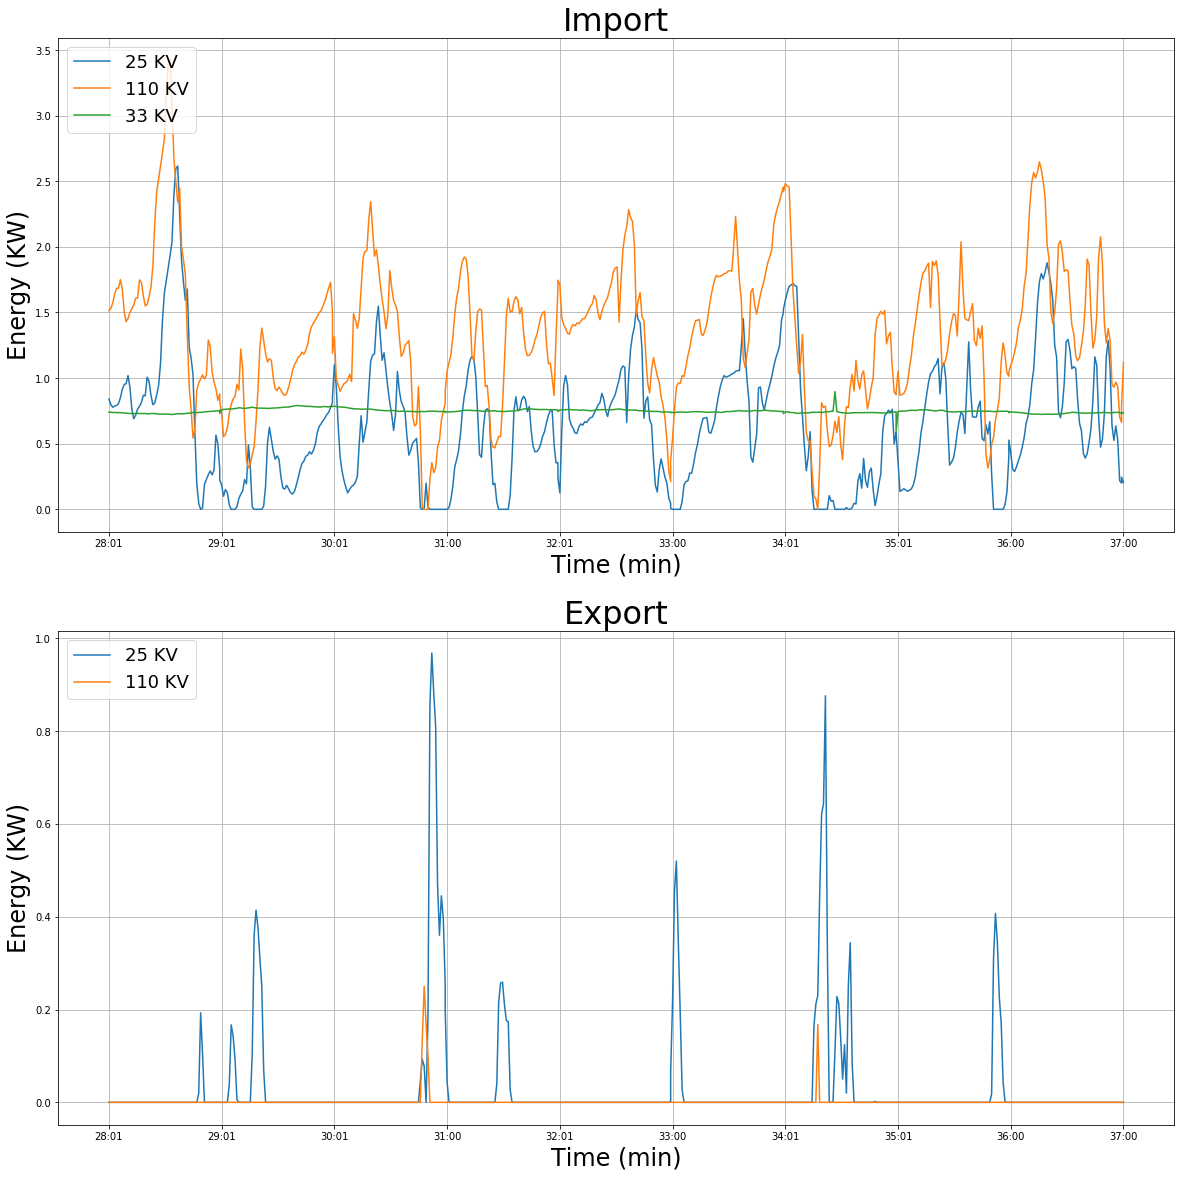

In [21]:
fig, ((ax1,ax2)) = plt.subplots(2, 1, figsize=(20,20))

# First plot the consumptions at all voltage level
ax1.plot(timeX,np.divide(in25Y, 1000), label = '25 KV')
ax1.plot(timeX,np.divide(in110Y, 1000), label = '110 KV')
ax1.plot(timeX,np.divide(in33Y, 1000), label = '33 KV')

# Set the properties of axes
ax1.grid(True)
ax1.legend(loc="upper left", fontsize=18,)
ax1.set_xticks(np.arange(0,9*60,59))
ax1.set_ylabel('Energy (KW)', fontsize=24)
ax1.set_xlabel('Time (min)', fontsize=24)
ax1.set_title('Import', fontsize=32)
bbox = ax1.get_tightbbox(fig.canvas.get_renderer())
fig.savefig("unprocessedImport.png", bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))

# First plot the consumptions at all voltage level
ax2.plot(timeX,np.divide(rg25Y, 1000), label = '25 KV')
ax2.plot(timeX,np.divide(rg110Y, 1000), label = '110 KV')
#ax2.plot(timeX,np.divide(rg33Y, 1000), label = '33 KV')

# Set the properties of axes
ax2.grid(True)
ax2.legend(loc="upper left", fontsize=18,)
ax2.set_xticks(np.arange(0,9*60,59))
ax2.set_ylabel('Energy (KW)', fontsize=24)
ax2.set_xlabel('Time (min)', fontsize=24)
ax2.set_title('Export', fontsize=32)
bbox = ax2.get_tightbbox(fig.canvas.get_renderer())
fig.savefig("unprocessedExport.png", bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))
